# Delay Structure Evaluation
The notebook provides some timing evaluation steps which facilitate the evaluation of several delay components. It does not focus on explaining the python facilities in detail but to provide additional information on the structure of observed delays.

In [1]:
from timing import data_set as tds
import matplotlib.pyplot as plt

## Load the Timing File

In [2]:
timing_file_path = r"S:\output-data\timing.csv" # <-- Adjust your path here
ds = tds.load_data_set_from_file(timing_file_path)

## Delay by Event Source
The following graphic separates delay values of external and internal events. First, the axis objects are exported.

In [3]:
reg_axis_pred = ds.get_registration_axis(tds.DataSet.filter_include_predicted)
reg_axis_ext  = ds.get_registration_axis(tds.DataSet.filter_include_external)
bgn_axis_pred = ds.get_begin_distribution_axis(tds.DataSet.filter_include_predicted)
bgn_axis_ext  = ds.get_begin_distribution_axis(tds.DataSet.filter_include_external)
end_axis_pred = ds.get_end_distribution_axis(tds.DataSet.filter_include_predicted)
end_axis_ext  = ds.get_end_distribution_axis(tds.DataSet.filter_include_external)

After the data is available, the graphic is created.

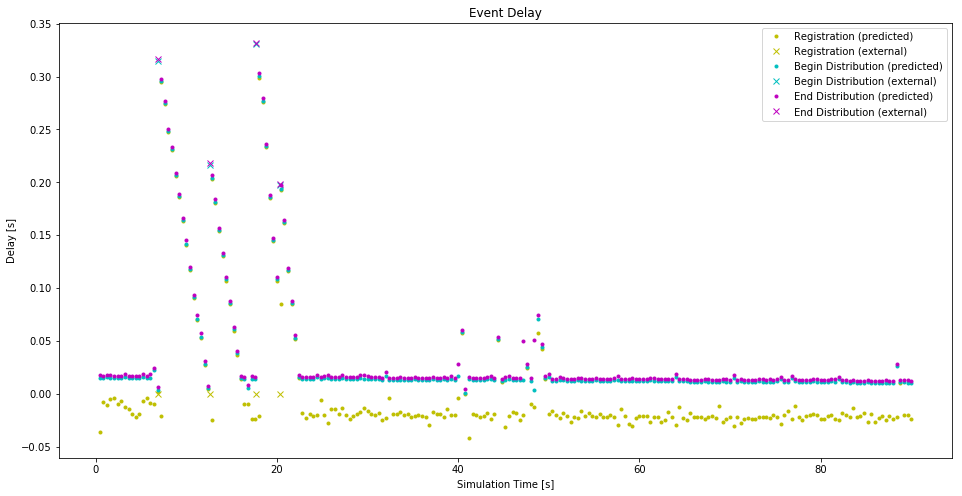

In [4]:
plt.figure(figsize=(16,8), dpi=72)

plt.plot(reg_axis_pred.get_simulation_time_data(), reg_axis_pred.get_delay(), 'y.', label="Registration (predicted)")
plt.plot(reg_axis_ext.get_simulation_time_data(), reg_axis_ext.get_delay(), 'yx', label="Registration (external)")
plt.plot(bgn_axis_pred.get_simulation_time_data(), bgn_axis_pred.get_delay(), 'c.', label="Begin Distribution (predicted)")
plt.plot(bgn_axis_ext.get_simulation_time_data(), bgn_axis_ext.get_delay(), 'cx', label="Begin Distribution (external)")
plt.plot(end_axis_pred.get_simulation_time_data(), end_axis_pred.get_delay(), 'm.', label="End Distribution (predicted)")
plt.plot(end_axis_ext.get_simulation_time_data(), end_axis_ext.get_delay(), 'mx', label="End Distribution (external)")

plt.ylabel("Delay [s]")
plt.xlabel("Simulation Time [s]")
plt.title("Event Delay")
plt.legend()
plt.show()

## Distribution Time
The distribution time is the time which is required for distributing and processing the event. An external event usually will not be sent to external entities and therefore only contains the time which is required to update the model.

In [5]:
dist_axis_pred = ds.get_distribution_delay_axis(tds.DataSet.filter_include_predicted)
dist_axis_ext = ds.get_distribution_delay_axis(tds.DataSet.filter_include_external)

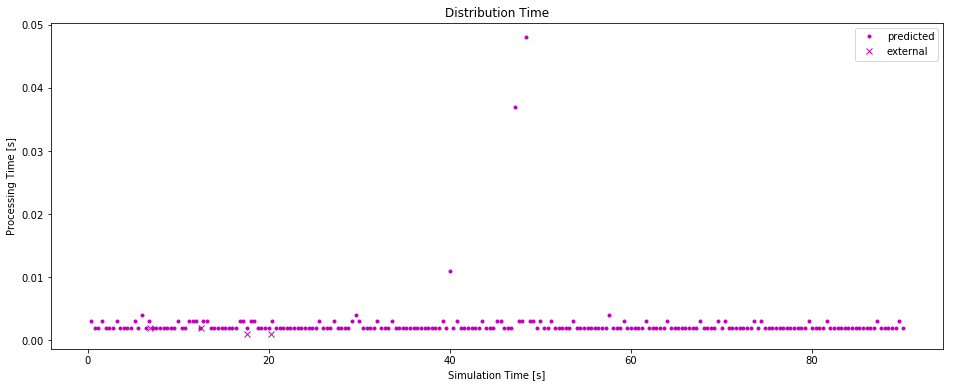

In [6]:
plt.figure(figsize=(16,6), dpi=72)

plt.plot(dist_axis_pred.get_simulation_time_data(), dist_axis_pred.get_delay(), 'm.', label="predicted")
plt.plot(dist_axis_ext.get_simulation_time_data(), dist_axis_ext.get_delay(), 'mx', label="external")

plt.ylabel("Processing Time [s]")
plt.xlabel("Simulation Time [s]")
plt.title("Distribution Time")
plt.legend()
plt.show()

## Prediction Time
Similarly, the time which is required to predict the next upcoming event is plotted. Each prediction duration is associated with the simulation time of the event which triggers the prediction.

In [7]:
pred_axis_pred = ds.get_triggered_prediction_delay_axis(tds.DataSet.filter_include_predicted)
pred_axis_ext = ds.get_triggered_prediction_delay_axis(tds.DataSet.filter_include_external)

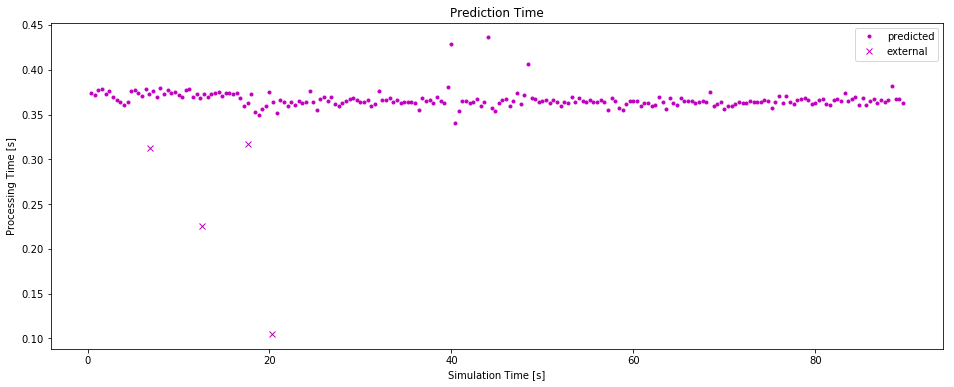

In [8]:
plt.figure(figsize=(16,6), dpi=72)

plt.plot(pred_axis_pred.get_simulation_time_data(), pred_axis_pred.get_delay(), 'm.', label="predicted")
plt.plot(pred_axis_ext.get_simulation_time_data(), pred_axis_ext.get_delay(), 'mx', label="external")

plt.ylabel("Processing Time [s]")
plt.xlabel("Simulation Time [s]")
plt.title("Prediction Time")
plt.legend()
plt.show()

## Waiting Time
The waiting time is the time from the registration to the distribution of an event. It corresponds to the time reserve of the scheduling. I.e. the longer an event is artificially delayed, the more reserve is in the schedule. Short delay values may indicate potential problems since FMITerminalBlock may try to catch up some delay.

In [9]:
wait_axis_pred = ds.get_wait_delay_axis(tds.DataSet.filter_include_predicted)
wait_axis_ext = ds.get_wait_delay_axis(tds.DataSet.filter_include_external)

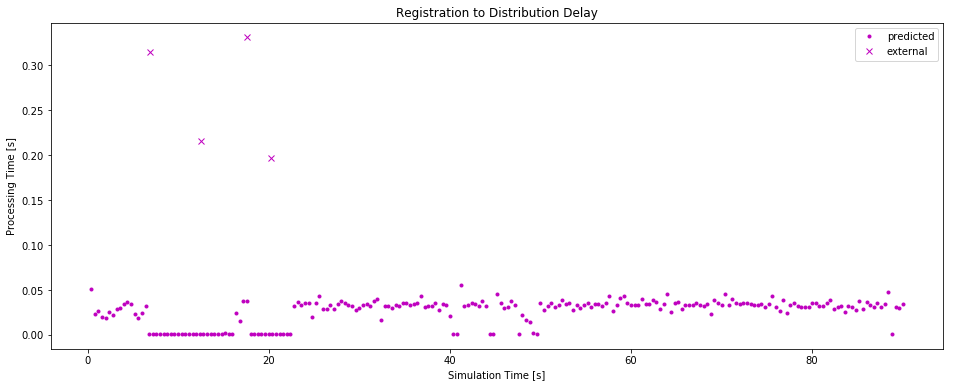

In [10]:
plt.figure(figsize=(16,6), dpi=72)

plt.plot(wait_axis_pred.get_simulation_time_data(), wait_axis_pred.get_delay(), 'm.', label="predicted")
plt.plot(wait_axis_ext.get_simulation_time_data(), wait_axis_ext.get_delay(), 'mx', label="external")

plt.ylabel("Processing Time [s]")
plt.xlabel("Simulation Time [s]")
plt.title("Registration to Distribution Delay")
plt.legend()
plt.show()